<a href="https://colab.research.google.com/github/Seyed-Ali-Ahmadi/Digital-Image-Processing/blob/master/DIP_course_5th_session_Histogram_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yoğunluk düzeyinde dilimleme

Basit eşiklemenin değiştirilmiş bir versiyonu, yoğunluğu birden fazla gri seviyeye bölmektir. Dilimleme sırasında her yoğunluk aralığı tek bir değere atanır.

Bu tıpkı çoklu eşik gibi...


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

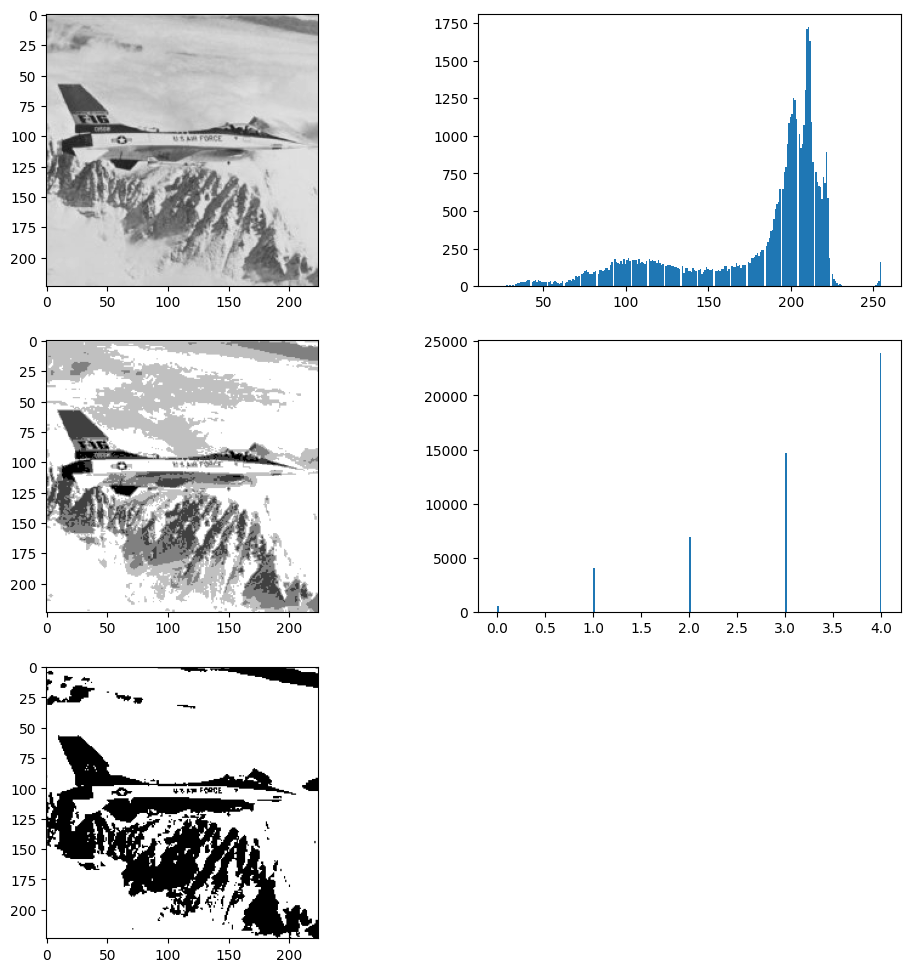

In [2]:
image = imread('https://github.com/Seyed-Ali-Ahmadi/Digital-Image-Processing/blob/master/data/airplane_grayscale.jpg?raw=true')
image = image[:, :, 0]

plt.figure(figsize=(12, 12))
plt.subplot(321)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.subplot(322)
plt.hist(image.ravel(), bins=256)

thresholded = image > 170

sliced = np.zeros_like(image)
sliced[image >  50] = 1
sliced[image > 100] = 2
sliced[image > 150] = 3
sliced[image > 200] = 4


plt.subplot(323)
plt.imshow(sliced, cmap='gray')
plt.subplot(324)
plt.hist(sliced.ravel(), bins=256)

plt.subplot(325)
plt.imshow(thresholded, cmap='gray')

plt.show()

# Histogram Eşitleme
Histogram eşitleme, histogramın yoğunluk dağılımını değiştirerek görüntünün kontrastını ayarlamak amacıyla görüntüleri işlemeye yönelik bir yöntemdir. Bu tekniğin amacı görüntüye ilişkin kümülatif olasılık fonksiyonuna doğrusal bir eğilim kazandırmaktır.

Histogram eşitlemesinin işlenmesi kümülatif olasılık fonksiyonunun (cdf) kullanımına dayanır. CDF, etki alanındaki tüm olasılıkların kümülatif toplamıdır ve şu şekilde tanımlanır:

![Histogram Eşitleme](http://s13.picofile.com/file/8398065676/equalization.png)


![Kameraman dengeleme](https://staff.fnwi.uva.nl/r.vandenboomgaard/IPCV20172018/_images/histeq.png)





In [3]:
mri = imread('https://github.com/Seyed-Ali-Ahmadi/Digital-Image-Processing/blob/master/data/MRI-spine1.tif?raw=true')
cameraman = imread('https://github.com/Seyed-Ali-Ahmadi/Digital-Image-Processing/blob/master/data/cameraman.tif?raw=true')
pout = imread('https://github.com/Seyed-Ali-Ahmadi/Digital-Image-Processing/blob/master/data/pout.jpg?raw=true')

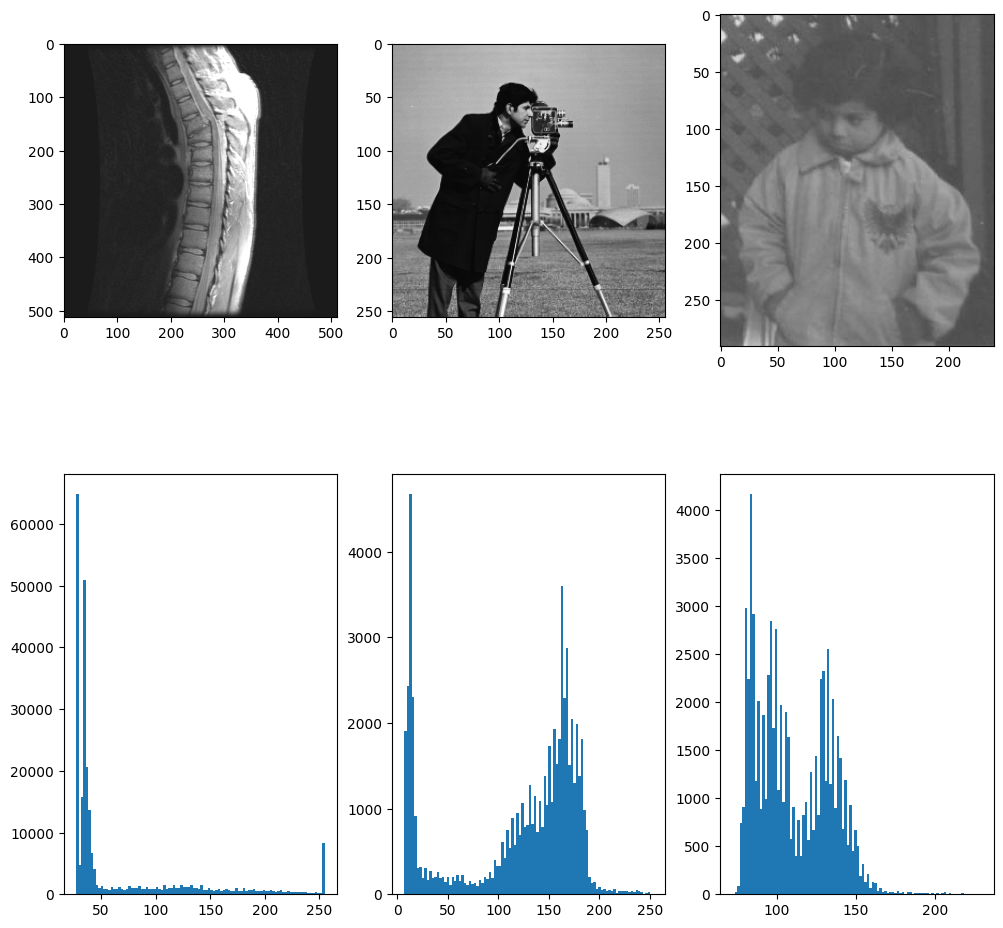

In [4]:
plt.figure(figsize=(12, 12))

plt.subplot(231), plt.imshow(mri, cmap='gray', vmin=0, vmax=255)
plt.subplot(234), plt.hist(mri.ravel(), bins=100)

plt.subplot(232), plt.imshow(cameraman, cmap='gray', vmin=0, vmax=255)
plt.subplot(235), plt.hist(cameraman.ravel(), bins=100)

plt.subplot(233), plt.imshow(pout, cmap='gray', vmin=0, vmax=255)
plt.subplot(236), plt.hist(pout.ravel(), bins=100)

plt.show()

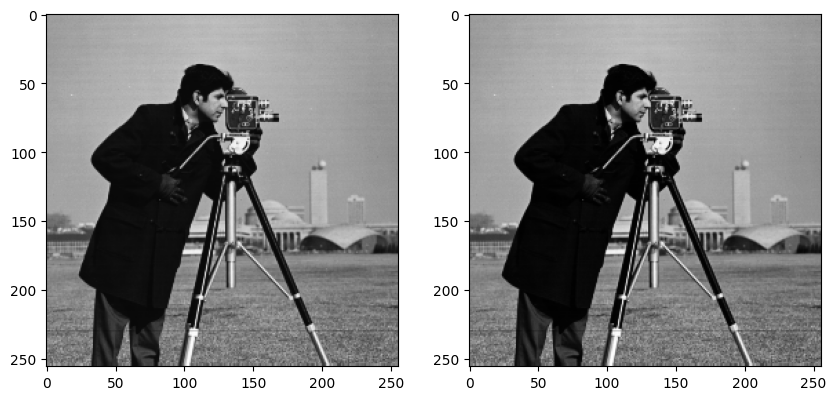

In [5]:
image = cameraman
Min = np.amin(image)
# Min = 10
Max = np.amax(image)
# Max = 180
stretched = (image - Min) / (Max - Min) * 255

plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.subplot(122), plt.imshow(stretched, cmap='gray', vmin=0, vmax=255)
plt.show()

f:D→[0,1]∈R, h(f) histogramına sahip skaler bir görüntü olsun. Histogram eşitleme, elde edilen görüntü Ψ(f)'nin sabit bir histograma sahip olacağı şekilde bir görüntü noktası operatörü Ψ oluşturur; bu, sonuçta ortaya çıkan görüntüdeki tüm skaler değerlerin eşit derecede olası olduğu anlamına gelir.



![Eq Steps](http://s12.picofile.com/file/8398102900/equalization_steps.PNG)



In [6]:
def histogramEqualization(f, bins=100):
    his, be = np.histogram(f, bins=bins)
    his = his.astype(float)/sum(his)
    return np.interp(f, be, np.hstack((np.zeros((1)), np.cumsum(his))))

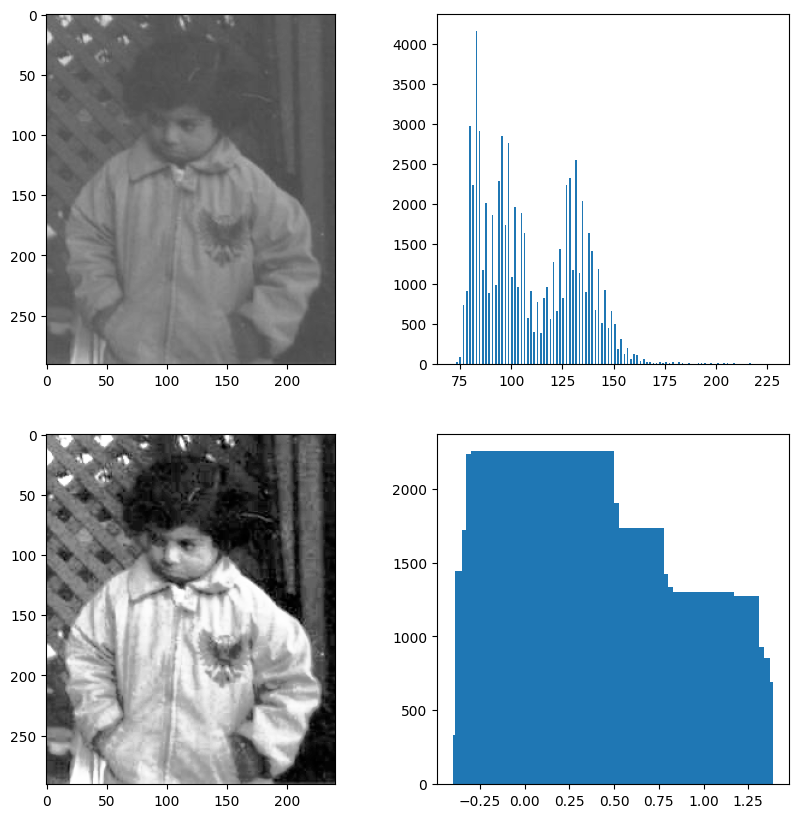

In [7]:
image = pout

plt.figure(figsize=(10, 10))

plt.subplot(221), plt.imshow(image, cmap='gray', vmin=0, vmax=255)
histo, range = np.histogram(image, bins=100)
plt.subplot(222), plt.bar(range[:-1], histo)

Eq = histogramEqualization(image)
plt.subplot(223), plt.imshow(Eq, cmap='gray')
histo, range = np.histogram(Eq, bins=100)
plt.subplot(224), plt.bar(range[:-1], histo)

plt.show()

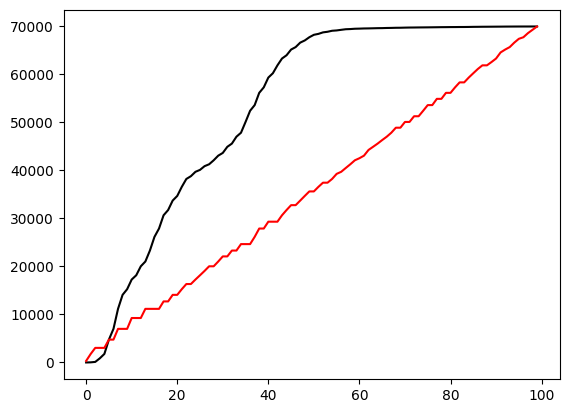

In [8]:
image = pout
histo, range = np.histogram(image, bins=100)
cdf_1 = np.cumsum(histo)

Eq = histogramEqualization(image)
histo, range = np.histogram(Eq, bins=100)
cdf_2 = np.cumsum(histo)

plt.figure()
plt.plot(cdf_1, 'k')
plt.plot(cdf_2, 'r')
plt.show()

![formula](https://t1.daumcdn.net/cfile/tistory/99859B465CF2298E20)


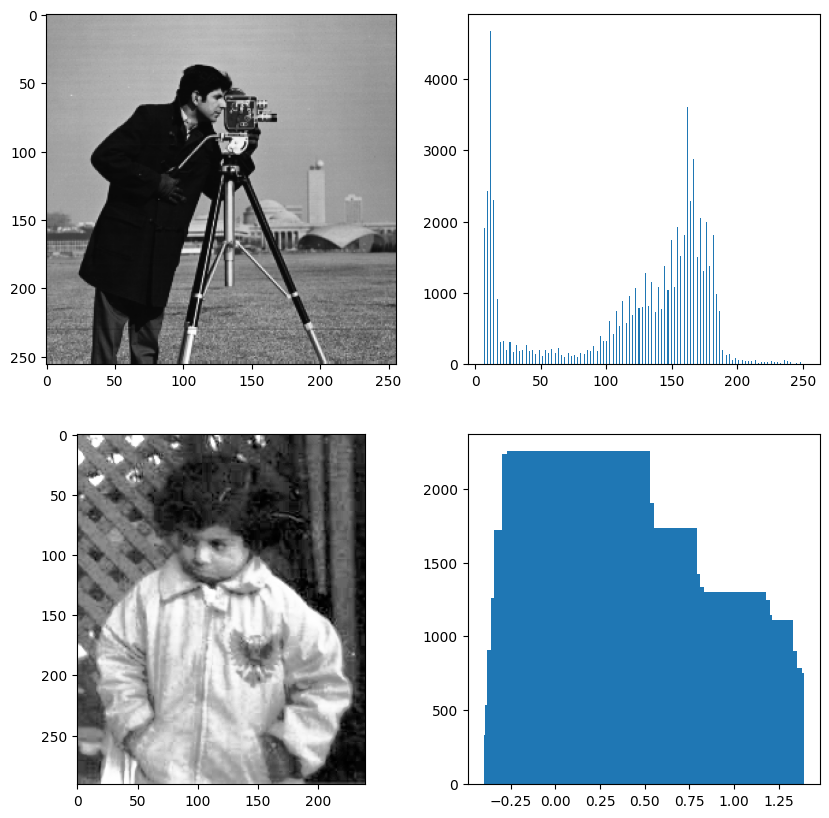

In [9]:
from skimage import exposure


plt.figure(figsize=(10, 10))

plt.subplot(221), plt.imshow(cameraman, cmap='gray', vmin=0, vmax=255)
histo, range = np.histogram(cameraman, bins=100)
plt.subplot(222), plt.bar(range[:-1], histo)
# Eşitleme
Eq = exposure.equalize_hist(image)
plt.subplot(223), plt.imshow(Eq, cmap='gray')
histo, range = np.histogram(Eq, bins=100)
plt.subplot(224), plt.bar(range[:-1], histo)

plt.show()

# Histogram Eşleştirme

Histogram eşleştirme, birden fazla görüntünün birbirine benzemesini sağlama işlemidir.

![eşleştirme](https://www.researchgate.net/profile/Ahmad_Shahrizan_Abdul_Ghani2/publication/317560583/figure/fig3/AS:504719627624449@1497345944827/The-process-of-histogram-matching-21_W640.jpg)


![eşleştirme](https://upload.wikimedia.org/wikipedia/commons/e/eb/Histogram_matching.PNG)


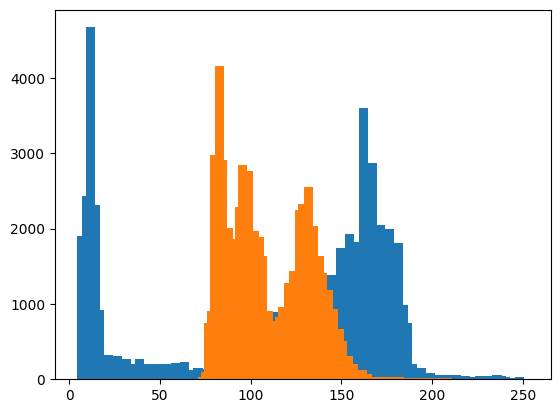

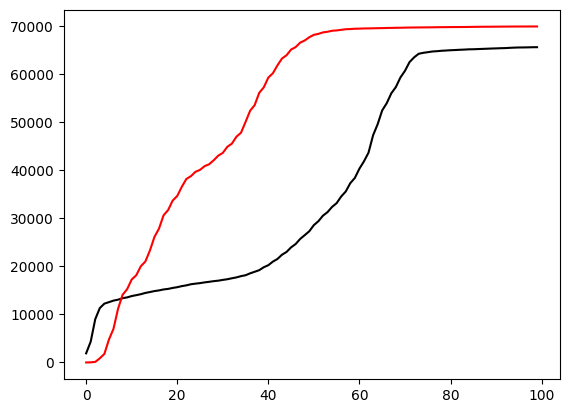

In [10]:
hist = np.histogram(cameraman.ravel(), bins=100)
plt.bar(hist[1][:-1], hist[0], width=5)
cdf_1 = np.cumsum(hist[0])

hist = np.histogram(pout.ravel(), bins=100)
plt.bar(hist[1][:-1], hist[0], width=5)
cdf_2 = np.cumsum(hist[0])

plt.figure()
plt.plot(cdf_1, 'k')
plt.plot(cdf_2, 'r')

In [11]:
from skimage.exposure import match_histograms

reference = cameraman
image = mri

matched = match_histograms(image, reference, multichannel=False)

<ipython-input-11-ebdcc5b3b29c>:6: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched = match_histograms(image, reference, multichannel=False)


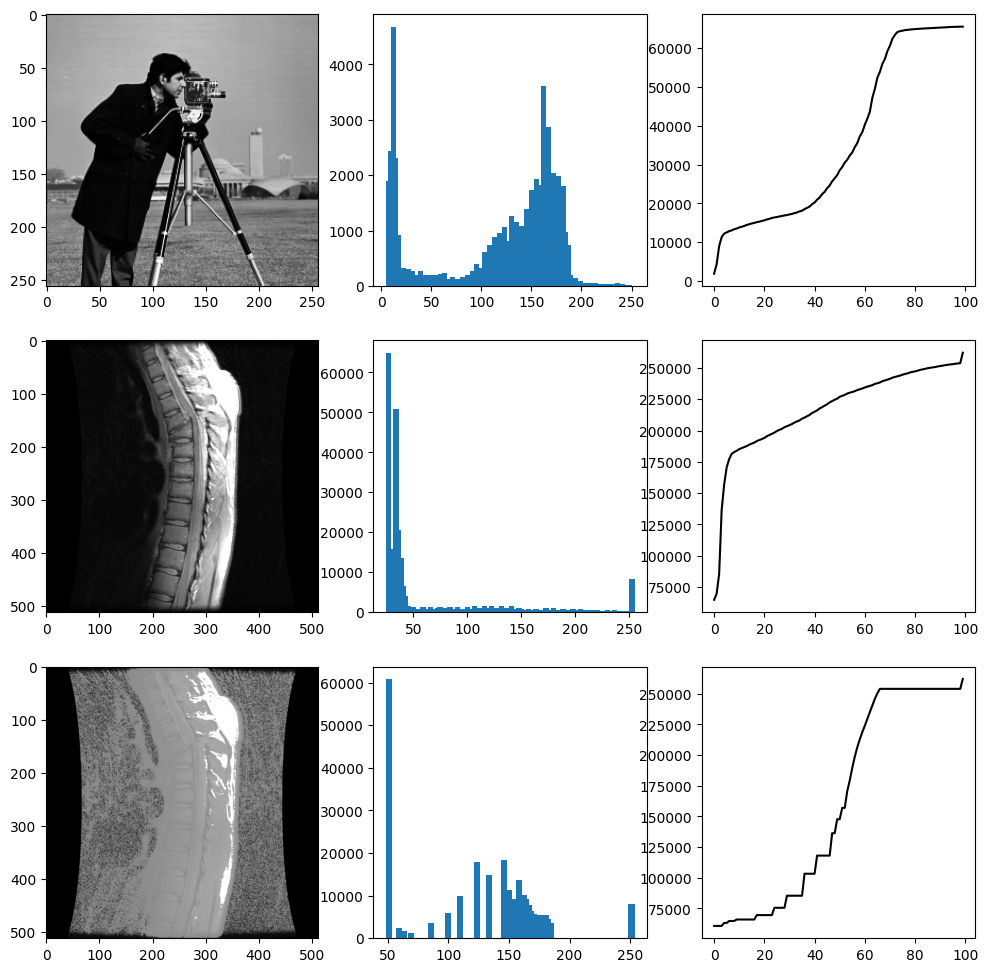

In [12]:
plt.figure(figsize=(12, 12))

image = cameraman
hist = np.histogram(image.ravel(), bins=100)
plt.subplot(331)
plt.imshow(image, cmap='gray')
plt.subplot(332)
plt.bar(hist[1][:-1], hist[0], width=5)
plt.subplot(333)
plt.plot(np.cumsum(hist[0]), 'k')


image = mri
hist = np.histogram(image.ravel(), bins=100)
plt.subplot(334)
plt.imshow(image, cmap='gray')
plt.subplot(335)
plt.bar(hist[1][:-1], hist[0], width=5)
plt.subplot(336)
plt.plot(np.cumsum(hist[0]), 'k')

image = matched
hist = np.histogram(image.ravel(), bins=100)
plt.subplot(337)
plt.imshow(matched, cmap='gray')
plt.subplot(338)
plt.bar(hist[1][:-1], hist[0], width=5)
plt.subplot(339)
plt.plot(np.cumsum(hist[0]), 'k')

plt.show()